In [1]:
import scipy as sp

In [2]:
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")

In [3]:
print(data[:5])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]]


In [4]:
print(data.shape)

(743, 2)


In [5]:
x = data[:,0]
y = data[:,1]

In [6]:
sp.sum(sp.isnan(y))

8

In [7]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [8]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

In [9]:
#fp1,  residuals,  rank,  sv,  rcond  =  sp. polyfit  (  х,  у,  1,  full=True)
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full = True)

In [10]:
print("Параметры модели fp1: %s" % fp1)
print("Ошибка модели fp1:", res1)

Параметры модели fp1: [  2.59619213 989.02487106]
Ошибка модели fp1: [3.17389767e+08]


In [11]:
f1 = sp.poly1d(fp1)

In [12]:
print(error(f1, x, y))

317389767.339778


In [13]:
fx = sp.linspace(0, x[-1], 1000)  #  сгенериовать значения Х для гафика

In [14]:
f2p = sp.polyfit(x, y, 2)

In [15]:
print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [16]:
f2 = sp.poly1d(f2p)

In [17]:
print(error(f2, x, y))

179983507.8781792


In [18]:
f3p = sp.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)
print(error(f3, x, y))

139350144.03172523


In [19]:
import matplotlib.pyplot as plt

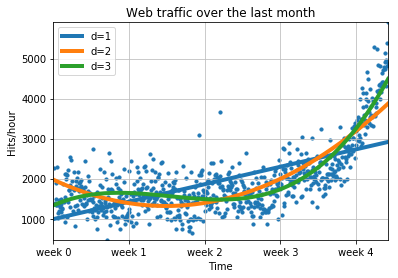

In [20]:
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.75')
plt.plot(fx, f1(fx), linewidth=4)
plt.plot(fx, f2(fx), linewidth=4)
plt.plot(fx, f3(fx), linewidth=4)
plt.legend(["d=%i" % f1.order, "d=%i" % f2.order, "d=%i" % f3.order], loc = "upper left")
#plt.legend(["d=%i" % m.order for m in models], loc="upper left")
plt.show()

## Новый взгляд нга данные: разделим данные в точке 3.5 недели

In [28]:
inflection = int(3.5 * 7 * 24) #вычислить положение точки изгиба в часах
xa = x[:inflection] #данные до точки изгиба
ya = y[:inflection]
xb = x[inflection:] #данные после точки изгиба
yb = y[inflection:]

In [29]:
fa = sp.poly1d(sp.polyfit(xa, ya, 1)) 
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

In [32]:
fa_error = error(fa, xa, ya) 
fb_error = error(fb, xb, yb) 
print("Error inflection=%f"  % (fa_error + fb_error)) 

Error  inflection=132950348.197616


In [34]:
fxa = sp.linspace(0, x[inflection], 1000)  #  сгенериовать значения Х для гафика до точки изгиба
fxb = sp.linspace(x[inflection], x[-1], 1000)  #  сгенериовать значения Х для гафика после точки изгиба

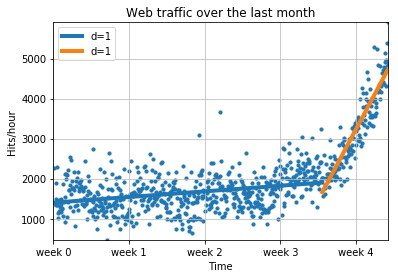

In [35]:
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.75')
plt.plot(fxa, fa(fxa), linewidth=4)
plt.plot(fxb, fb(fxb), linewidth=4)
plt.legend(["d=%i" % fa.order, "d=%i" % fb.order], loc = "upper left")
#plt.legend(["d=%i" % m.order for m in models], loc="upper left")
plt.show()

In [36]:
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))

In [37]:
fb2_error = error(fb2, xb, yb)
fb3_error = error(fb3, xb, yb)

In [39]:
print('error d=1: ', fb_error)
print('error d=2: ', fb2_error)
print('error d=3: ', fb3_error)

error d=1:  22143941.107618243
error d=2:  19768846.989176333
error d=3:  19766452.361026973


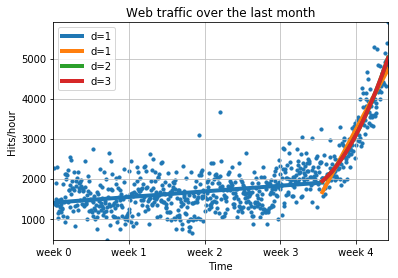

In [41]:
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.75')
plt.plot(fxa, fa(fxa), linewidth=4)
plt.plot(fxb, fb(fxb), linewidth=4)
plt.plot(fxb, fb2(fxb), linewidth=4)
plt.plot(fxb, fb3(fxb), linewidth=4)
plt.legend(["d=%i" % fa.order, "d=%i" % fb.order, "d=%i" % fb2.order, "d=%i" % fb3.order], loc = "upper left")
#plt.legend(["d=%i" % m.order for m in models], loc="upper left")
plt.show()

## separating training from testing data


In [42]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))

In [45]:
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

In [62]:
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))

fbt2(x)= 
         2
0.08321 x - 90.76 x + 2.651e+04
fbt2(x)-100,000= 
         2
0.08321 x - 90.76 x - 7.349e+04


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


In [63]:
print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 6975858.053852
Error d=2: 6419470.653770
Error d=3: 6420704.035070
Error d=10: 6242383.808412


In [64]:
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

In [67]:
import os

In [69]:
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


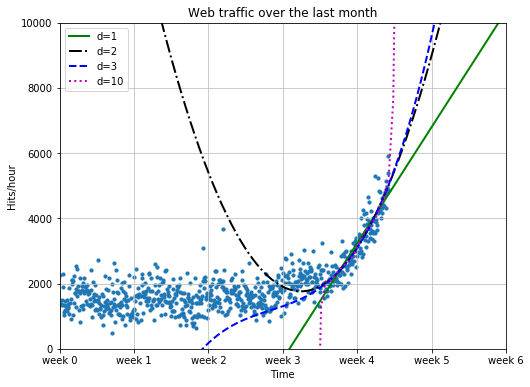

In [70]:
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10],
    os.path.join("./", "1400_01_08.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [71]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

         2
0.08321 x - 90.76 x + 2.651e+04
         2
0.08321 x - 90.76 x - 7.349e+04
100,000 hits/hour expected at week 9.713571
